In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier 

## Step 1: create a model and save it to disk

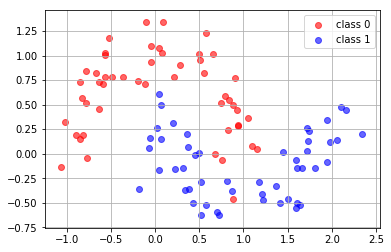

In [2]:
X,y = make_moons(100, noise=.2)
plt.scatter(X[:,0][y==0], X[:,1][y==0], color="red", label="class 0", alpha=.6)
plt.scatter(X[:,0][y==1], X[:,1][y==1], color="blue", label="class 1", alpha=.6)
plt.grid(); plt.legend();

In [3]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X,y)
dt.score(X,y)

0.9

In [4]:
dt.predict([[-1,0]])

array([0])

In [5]:
dt.predict([[1,0]])

array([1])

In [6]:
import pickle
pickle.dump(dt, open('dtmodel.pckl', 'wb'))

## Step 2: Serve the prediction through a REST API

In [7]:
%%writefile server.py
from flask import Flask, request, redirect, url_for, flash, jsonify
import pickle
import json
import numpy as np

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    print ("LOG: predicting on input", data)
    prediction = np.array2string(model.predict(data))
    print ("LOG: returning predictions", prediction)
    return jsonify(prediction)


if __name__ == '__main__':
    modelfile = 'dtmodel.pckl'
    model = pickle.load(open(modelfile, 'rb'))
    print ("LOG: serving model", model.__class__.__name__)
    app.run(debug=True, host='0.0.0.0', port=7766)

Writing server.py


In [8]:
import sys
e = sys.executable
e

'/home/user/.conda/envs/p37/bin/python'

In [19]:
pip = "/".join(e.split("/")[:-1])+"/pip"
!pip install flask

    100% |████████████████████████████████| 102kB 4.1MB/s a 0:00:011
    100% |████████████████████████████████| 81kB 6.9MB/s ta 0:00:011


In [20]:
!$e server.py

LOG: serving model DecisionTreeClassifier
 * Serving Flask app "server" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
 * Running on http://0.0.0.0:7766/ (Press CTRL+C to quit)
 * Restarting with stat
LOG: serving model DecisionTreeClassifier
 * Debugger is active!
 * Debugger PIN: 282-236-014
LOG: predicting on input [[-1, 0], [2, 0]]
LOG: returning predictions [0 1]
127.0.0.1 - - [21/Jan/2020 18:05:08] "POST /predict HTTP/1.1" 200 -
^C
